In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Cargar CSV

Importamos el dataset en este caso para predecir el costo del listado de carros

In [36]:
"""Guardamos el set de datos en una variable"""
dt = pd.read_csv('Datasets/House_Rent_Dataset.csv')

# Comprencion de los datos

Visualizamos el set de datos para saber si hay datos corruptos que puedan afectar la prediccion de nuestro modelo

In [37]:
"""Visualizamos la tabla de datos"""
dt.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [38]:
"""Contamos las variables del tipo de area"""
td = dt['Area Type'].value_counts()
td

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [39]:
"""Identificamos el tipo de variable de cada columna"""
dt.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [40]:
"""Analizamos la informacion del set de datos"""
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [41]:
"""Revisamos si existen datos nulos"""
dt.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [42]:
"""Usamos la funcion describe para saber los minimos, maximos, desviacion estadar, y porcentajes de los datos"""
dt.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


C:\Users\Stefano\AppData\Local\Temp\ipykernel_3692\3825150344.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dt.hist(ax = ax)


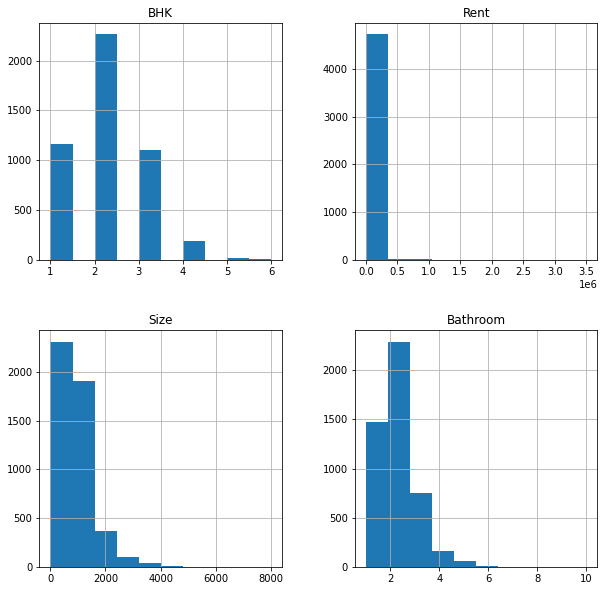

In [43]:
"""Graficamos las columnas para ver la distribucion de los mismos"""
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
dt.hist(ax = ax)
plt.show()

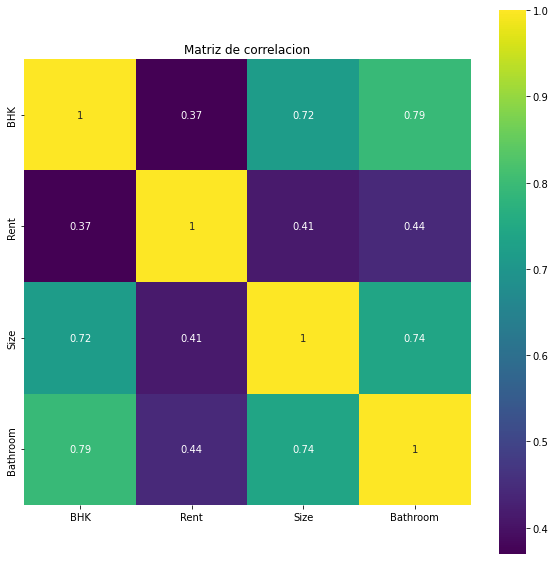

In [44]:
"""Graficamos las correlacion de los datos"""
import seaborn as sns
cor = dt.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(cor, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

# Preprocesamiento

In [45]:
"""Convertimos Post On a un formato fecha"""
dt["Posted On"] = pd.to_datetime(dt['Posted On'])

In [47]:
"""Eliminamos los datos que puedan traer ruido al modelo"""
dt.drop(columns = ["Floor", "Area Locality"], inplace = True)
dt.drop(columns = "Posted On", inplace = True)

In [48]:
"""Pasamos nuestros datos a un array"""
array = dt.values
X = array[:, 0:7]
"""En la Y colocamos la columna que se quiere predecir"""
Y = array[:, 3]

In [49]:
"""Estandarizamos y Escalamos nuestros datos"""
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

sta = StandardScaler()
rescaledX = sta.fit_transform(X)

X = rescaledX

# Modelado

Provamos que algoritmos se adaptan mejor a nuestros datos

In [50]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

"""Creamos una lista y metemos cada uno de los modelos a usar"""
models = []
models.append(('ElN', ElasticNet()))
models.append(('LS', Lasso()))
models.append(('LR', LinearRegression()))
models.append(('RiG', Ridge()))
models.append(('KR', KNeighborsRegressor()))
models.append(('SVR',  SVR()))

results = []
names = []
scoring = 'accuracy'
"""Creamos un bucle que recorra la lista de modelos y nombres"""
for name, model in models:
    """Entrenamos nuestro modelo"""
    kfold = KFold(n_splits=10)
    """Calculamos el porcentaje de la prediccion"""
    result =  cross_val_score(model, X, Y,  cv=kfold)
    results.append(result)
    names.append(name)
    print(f"{name}: {result.mean()*100.0:,.2f} ({result.std()*100.0:,.2f})")

ElN: -27.97 (42.96)
LS: -28.16 (42.88)
LR: 100.00 (0.00)
RiG: 100.00 (0.00)
KR: 99.37 (0.61)
SVR: 97.93 (0.78)


In [51]:
"""Usamos el algoritmo que mejor se adapte para hacer la prediccion"""
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50 )
rdg = Ridge()
rdg.fit(X_train, y_train)
predicted = rdg.predict(X_test)
score =r2_score(y_test, predicted)
print(f"Score: {score}")

Score: 0.9999997904659964


In [70]:
data = rdg.predict(X_test)
dataframe = pd.DataFrame(data, columns = ["Predicted"])
dataframe.head(10)

,Predicted
0,1.000389
1,1.999733
2,1.999858
3,1.999775
4,1.999752
5,1.999719
6,1.000290
7,1.999732
8,1.999750
9,1.999921


# Conclusion

En conclusion obtuvimos muy buenos resultados de los modelos provados anteriormente en especial en los modelos de Linear Regresion, Ridge, KNeighborsRegressor y SVR.Podemos concluir que el set de datos entregado dio la suficiente informacion a nuestro modelo para predecir el precio de la ventas.